### Examining KPF L1 data
9 November 2022

This Notebook is ready to be re-vamped to examine L1 data from the Nov commissioning run.
    

NOTES:  
The hdu.info() command will give a different orientation of the spectrum than shape.
info gives (4080, 35), but shape gives (35,4080)

In [1]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [65]:
# Commissioniong data from night of 11/9
data_dir = "/Users/hisaacson/code/Intro-2-Spectra/data/kpf/"
f1 = 'KP.20221110.23757.92_L1.fits' # Stellar spectrum of HD 1326
f1 = 'KP.20230820.20231.39_L1.fits' # stellar spectrum of 166620
hdu = fits.open(data_dir+f1)


kdata1g = hdu['GREEN_SCI_FLUX1'].data
kdata2g = hdu['GREEN_SCI_FLUX2'].data
kdata3g = hdu['GREEN_SCI_FLUX3'].data
kdatag = kdata1g+kdata2g+kdata3g

kdata1r = hdu['RED_SCI_FLUX1'].data
kdata2r = hdu['RED_SCI_FLUX2'].data
kdata3r = hdu['RED_SCI_FLUX3'].data
kdatar = kdata1r+kdata2r+kdata3r


kwave1g = hdu['GREEN_SCI_WAVE1'].data
kwave2g = hdu['GREEN_SCI_WAVE2'].data
kwave3g = hdu['GREEN_SCI_WAVE3'].data

kwave1r = hdu['RED_SCI_WAVE1'].data
kwave2r = hdu['RED_SCI_WAVE2'].data
kwave3r = hdu['RED_SCI_WAVE3'].data
kwave1r.shape

# The barycentric correction is in HDU[42]

head = hdu[42].header
bcinfo_all_orders = hdu[42].data
bcinfo_one_order  = hdu[42].data[0]
bcs = bcinfo_one_order
print('Single Geometric UT Date: ',bcs[0])
print('Single Geometric BJD: ',bcs[1])
print('Single Photon weighted BJD: ',bcs[2])
print('Single Barycentric Correction(m/s): ',bcs[3])

# print all header and BC info
print(repr(head))
print(bcs)

Single Geometric UT Date:  2023-08-20T05:39:48.900
Single Geometric BJD:  2460176.735982639
Single Photon weighted BJD:  2460176.736010336
Single Barycentric Correction(m/s):  -11039.247176503639
XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   47 / length of dimension 1                          
NAXIS2  =                   67 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of table fields                         
EXTNAME = 'BARY_CORR'          / extension name                                 
BCV_UNIT= 'm/sec   '                                                       

In [ ]:
# Open a HIRES spectrum and overplot
#   rj08.882              1326   22005.154 13549.106204  22.265 t


5939.844679760053


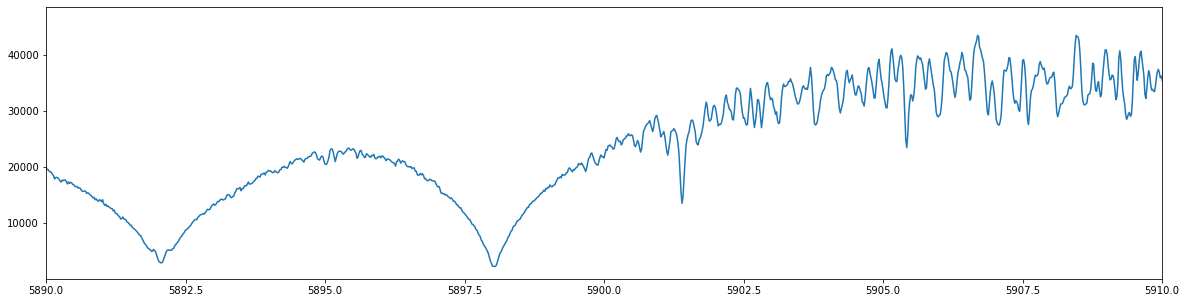

In [164]:
plt.figure(figsize=(20,5))
#plt.xlim(500,503)
#plt.ylim(0,0.3e10)
ord=33
w1 = 5890
w2 = 5910
plt.xlim(w1,w2)
#ind = kwave1g[(kwave1[ord,:] > w1) & (kwave1g[ord,:] < w2)]
plt.plot(kwave1g[ord,:],kdatag[ord,:])
#print(kdata1[1,10:15])
print(kwave1g[ord,10])
#hdu.info()
#4  GREEN_SCI_FLUX1    1 ImageHDU        13   (4080, 35)   float64   
#  5  GREEN_SCI_FLUX2    1 ImageHDU        13   (4080, 35)   float64   
#  6  GREEN_SCI_FLUX3    1 ImageHDU        13   (4080, 35)   float64   
#  4  GREEN_SCI_WAVE1    1 ImageHDU         8   (4080, 35)   float64   
# 15  GREEN_SCI_WAVE2    1 ImageHDU         8   (4080, 35)   float64   
# 16  GREEN_SCI_WAVE3    1 ImageHDU         8   (4080, 35)   float64 

7101.0565148025435


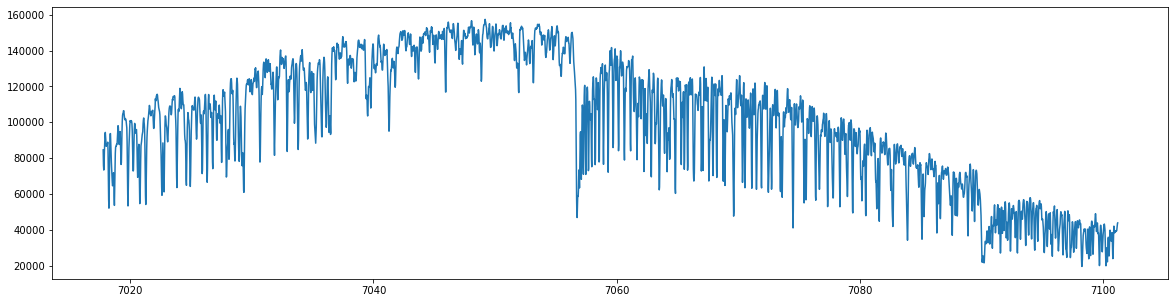

In [149]:
plt.figure(figsize=(20,5))
ord=15
p1=0
p2=4000
plt.plot(kwave1r[ord,p1:p2],kdatar[ord,p1:p2])
print(kwave1r[ord,10])

7101.0565148025435


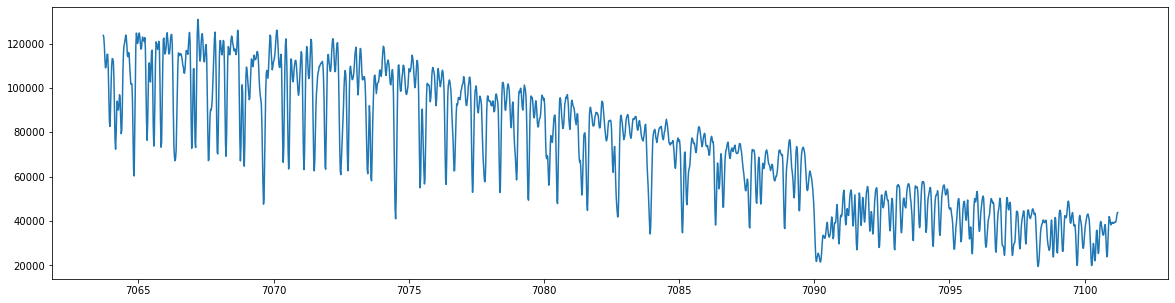

In [150]:
plt.figure(figsize=(20,5))
ord=15
p1=0
p2=2000
plt.plot(kwave1r[ord,p1:p2],kdatar[ord,p1:p2])
print(kwave1r[ord,10])

7101.0565148025435


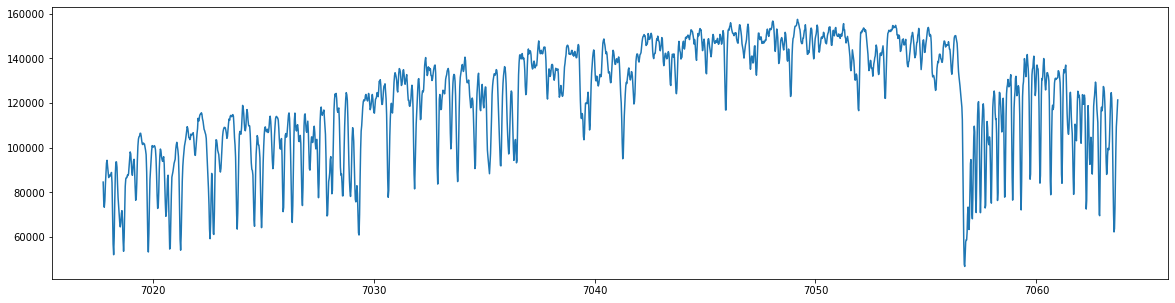

In [152]:
plt.figure(figsize=(20,5))
ord=15
p1=2000
p2=4000
plt.plot(kwave1r[ord,p1:p2],kdatar[ord,p1:p2])
print(kwave1r[ord,10])

In [ ]:
4  GREEN_SCI_FLUX1    1 ImageHDU        13   (4080, 35)   float64   
  5  GREEN_SCI_FLUX2    1 ImageHDU        13   (4080, 35)   float64   
  6  GREEN_SCI_FLUX3    1 ImageHDU        13   (4080, 35)   float64   
  7  GREEN_SKY_FLUX    1 ImageHDU        13   (4080, 35)   float64   
  8  GREEN_CAL_FLUX    1 ImageHDU        13   (4080, 35)   float64   
  4  GREEN_SCI_WAVE1    1 ImageHDU         8   (4080, 35)   float64   
 15  GREEN_SCI_WAVE2    1 ImageHDU         8   (4080, 35)   float64   
 16  GREEN_SCI_WAVE3    1 ImageHDU         8   (4080, 35)   float64   
 1

In [179]:
# Open some HIRES data and compare the ThAr wavelength solutions.
# Focus on 500nm to 600nm, and only work with the HIRES middle chip.
hires_wls_fname = "/Users/hisaacson/data/mir3/keck_rwav.fits"
hires_wls_hdu = fits.open(hires_wls_fname)
hires_wls = hires_wls_hdu[0].data /10.
hires_wls_flat = hires_wls.flatten()

# Now open a HIRES Thorium for comparison.
# hwave.info()
# print(np.min(data1),np.max(data1))
# Combine the HIRES wls into a single array
hires_thar_fname = "/Users/hisaacson/data/mir3/iodfits/rj138.16.fits"
hires_th_hdu = fits.open(hires_thar_fname)
hires_th = hires_th_hdu[0].data
hires_th_hdu.info()
hires_th_flat = hires_th.flatten()

Filename: /Users/hisaacson/data/mir3/iodfits/rj138.16.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     722   (4021, 16)   float32   


In [180]:
# found one observation of Neon with Thorium.
# j16.logsheet1:110   thar            n   3:30:33     1  bg14,B5, ThAr1 (w/ Neon!)
# j16.logsheet1:109   thar            n   3:30:33     1  bg14,B5 , ThAr2  (normal ThAr for comparison)

hires_thar_b5_fname = "/Users/hisaacson/data/mir3/iodfits/rj16.109.fits"  # B5 ThAr for comparison
hires_th_neon_fname = "/Users/hisaacson/data/mir3/iodfits/rj16.110.fits"  # B5 Th-Neon

hires_tharb5_hdu   = fits.open(hires_thar_b5_fname)
hires_thar_b5      = hires_tharb5_hdu[0].data
hires_thar_b5_flat = hires_thar_b5.flatten()
hires_th_neon_hdu  = fits.open(hires_th_neon_fname)
hires_th_neon      = hires_th_neon_hdu[0].data
hires_th_neon_flat = hires_th_neon.flatten()

In [181]:
print(len(hires_wls_flat),len(hires_th_flat))

64336 64336


[(500.0, 503.0), (0.0, 300000.0)]

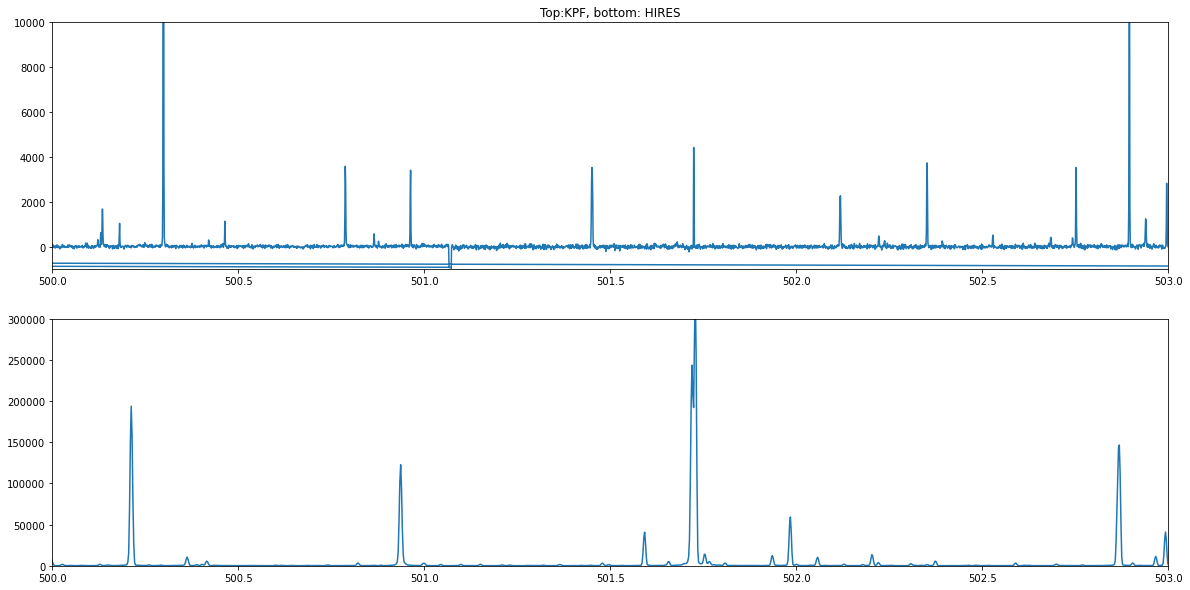

In [189]:
# Start with order 0 on HIRES and overplot the KPF spectrum
plt.figure(figsize=(20,10))
ax   = plt.subplot(2,1,1)
ax2  = plt.subplot(2,1,2)#,sharex=ax,sharey=ax)

ax.set(xlim=[500,503],ylim=[-1e3,1e4], title = "Top:KPF, bottom: HIRES")
ax.plot(kpf_th.wave,kpf_th.flux)   # KPF


ax2.plot(hires_wls_flat,hires_th_flat)
ax2.set(xlim=[500,503],ylim=[0,3e5])   #HIRES
#plt.ylim(0,0.3e10)


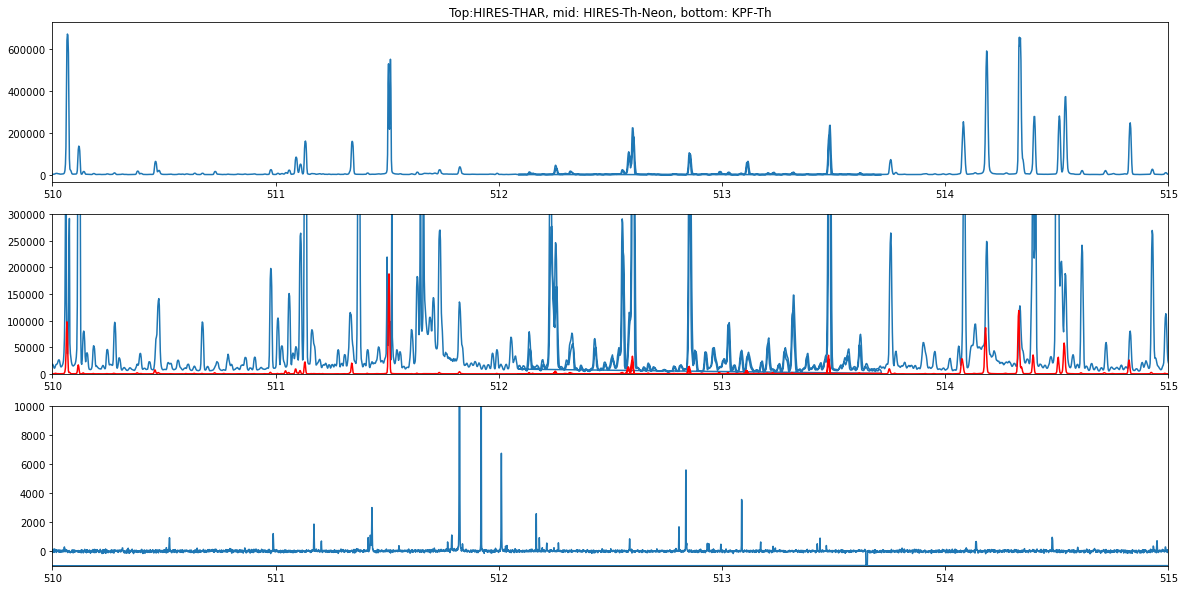

In [194]:
# Start with order 0 on HIRES. Plot the Th-Ar and Th-neon
plt.figure(figsize=(20,10))
ax   = plt.subplot(3,1,1)
ax2  = plt.subplot(3,1,2)#,sharex=ax,sharey=ax)
ax3  = plt.subplot(3,1,3)

x1=510
x2=515

ax.set(xlim=[x1,x2], title = "Top:HIRES-THAR, mid: HIRES-Th-Neon, bottom: KPF-Th")
ax.plot(hires_wls_flat,hires_thar_b5_flat)   # HIRES_THAR

ax2.plot(hires_wls_flat,hires_th_neon_flat) # HIRES_ThNeon
ax2.plot(hires_wls_flat,hires_th_flat,c='r')      # HIRES-thar-D5

ax2.set(xlim=[x1,x2],ylim=[0,3e5])   #HIRES_TH-Neon

ax3.set(xlim=[x1,x2],ylim=[-1e3,1e4])
ax3.plot(kpf_th.wave,kpf_th.flux)
#plt.ylim(0,0.3e10)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])